In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv("titanic.csv")
df=df.sample(frac=1, random_state=42)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [107]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
df.dropna(subset=["Embarked"], inplace=True)

In [109]:
df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1, inplace=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 709 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [111]:
df["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [112]:
df["Parch"].value_counts()

Parch
0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64

In [113]:
df["fam_mem"]=df["Parch"]+df["SibSp"]

In [114]:
df["fam_mem"].value_counts()

fam_mem
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [115]:
#travelling alone or not 
#if sibsp and parch values are 0 then assign 1 else assign 0 
df["travelling_alone"]=(df["fam_mem"]==0).astype(int)

In [116]:
df["travelling_alone"].value_counts()

travelling_alone
1    535
0    354
Name: count, dtype: int64

In [117]:
df.groupby(df["travelling_alone"])["Survived"].mean()*100

travelling_alone
0    50.564972
1    30.093458
Name: Survived, dtype: float64

In [118]:
df.groupby(df["Embarked"])["Survived"].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [119]:
df.groupby(df["Pclass"])["Survived"].mean()*100

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [120]:
df.groupby(df["Sex"])["Survived"].mean()*100

Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

In [122]:
df.drop(["fam_mem"],axis=1, inplace=True)

In [124]:
map={"female":1,"male":0}
df["Sex"].replace(map,inplace=True)

In [125]:
df['Age'].fillna(df.Age.mean(),inplace=True)

In [126]:
df=pd.concat([df,pd.get_dummies(df['Embarked'], drop_first=True).astype(int)],axis=1)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 709 to 102
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            889 non-null    int64  
 1   Sex               889 non-null    int64  
 2   Age               889 non-null    float64
 3   SibSp             889 non-null    int64  
 4   Parch             889 non-null    int64  
 5   Fare              889 non-null    float64
 6   travelling_alone  889 non-null    int64  
 7   Q                 889 non-null    int64  
 8   S                 889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 101.7 KB


In [128]:
y=df['Survived']
df.drop("Survived",axis=1, inplace=True)

In [129]:
df.drop("Embarked", axis=1, inplace=True)

In [ ]:
class PCA:
    def __init__(self, mat,n_components):
        self.A=self.standardize_data(mat)
        self.n_components=n_components
    def fit_transform(self):
        self.n_samples = self.A.shape[0]
        covariance_matrix = self.get_covariance_matrix()
        eigenvalues, eigenvectors = self.get_eigenvectors(covariance_matrix)
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator
    
    def get_covariance_matrix(self, ddof=0):
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        eigenvalues, eigenvectors = np.linalg.eig(C)
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return eigenvalues, selected_vectors

    def project_matrix(self, eigenvectors):
        P = np.dot(self.A, eigenvectors)
        return P

In [201]:
pca=PCA(df,len(df.columns))

In [202]:
eigenvalues, eigenvectors = pca.get_eigenvectors(np.dot(df.T,df))

In [203]:
explained_variance=eigenvalues/eigenvalues.sum()

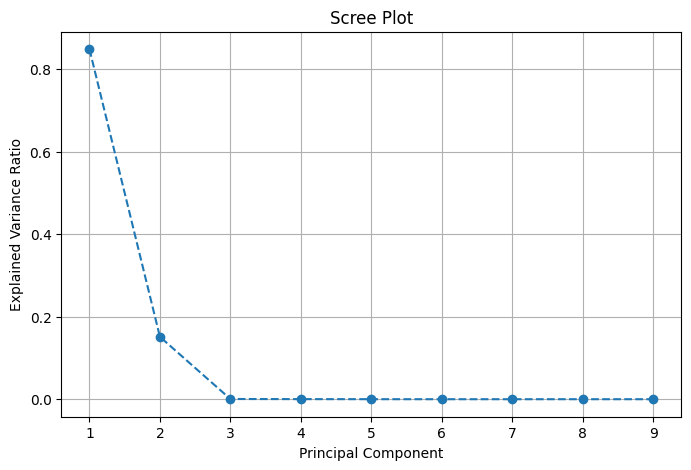

In [204]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

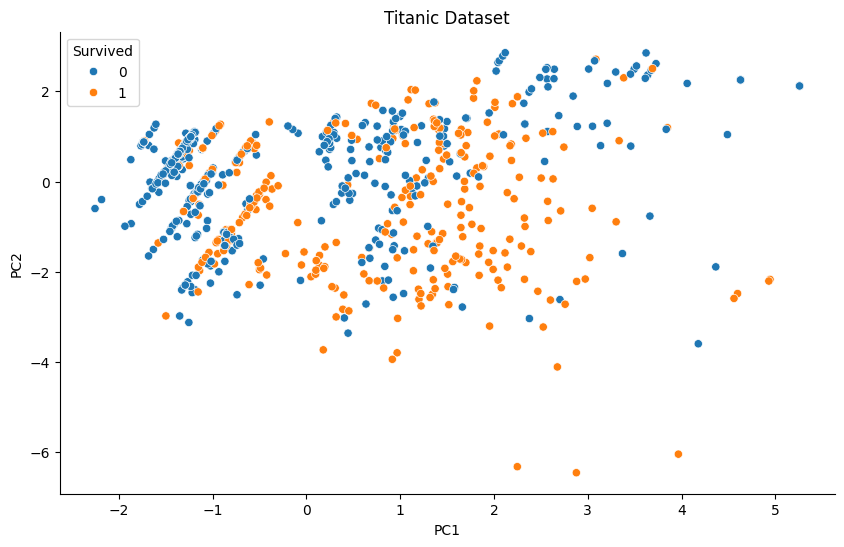

In [205]:
import seaborn as sns 

# instantiate and fit_transform PCA
pca = PCA(df,2)
X_pca = pca.fit_transform()


# plot results
fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.scatterplot(
    x = X_pca[:,0],
    y = X_pca[:,1],
    hue=y
)

ax.set_title('Titanic Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.despine()

In [206]:
df_pca=pd.DataFrame(X_pca)

In [276]:
split_idx = int(0.8 * len(df))

y_train = y[:split_idx]
x_train = df[:split_idx]
y_test = y[split_idx:]
x_test = df[split_idx:]

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [258]:

split_idx = int(0.8 * len(df))

y_train_pca=y[:split_idx]
x_train_pca=df_pca[:split_idx]
y_test_pca=y[split_idx:]
x_test_pca=df_pca[split_idx:]

x_train_pca=x_train_pca.to_numpy()
x_test_pca=x_test_pca.to_numpy()
y_train_pca=y_train_pca.to_numpy()
y_test_pca=y_test_pca.to_numpy()


In [259]:
m,n=np.shape(x_train_pca)
w=np.zeros((n,))
b=0

In [ ]:
def z_score_normalise(x):
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    return x_norm,mu,sigma
x_train,mu,sigma=z_score_normalise(x_train)
x_test=(x_test-mu)/sigma

SVM class

In [330]:
class SVM:
    def __init__(self, learning_rate=0.001, C=0.01, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.C * self.w)
                else:
                    self.w -= self.lr * (2 * self.C * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


SVM without PCA

In [349]:
svm=SVM(C=0.2)

In [350]:
svm.fit(x_train,y_train)

In [351]:
y_pred= svm.predict(x_test)

In [352]:
y_pred=np.where(y_pred==-1, 0, y_pred)

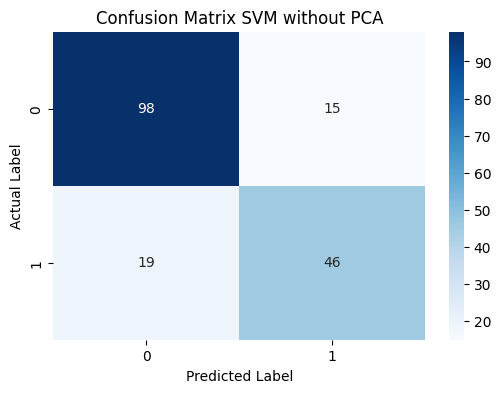

In [388]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix SVM without PCA')
plt.show()

In [389]:
TP = cm[1,1]  # True Positives
FP = cm[0,1]  # False Positives
FN = cm[1,0]  # False Negatives

# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(precision)
print(recall )
# Calculate F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score:{round(f1*100)}%")

0.7540983606557377
0.7076923076923077
F1 Score:73%


SVM with PCA

In [382]:
svm_pca=SVM(C=0.001)

In [383]:
svm_pca.fit(x_train_pca, y_train_pca)

In [384]:
y_pred_pca= svm_pca.predict(x_test_pca)

In [385]:
y_pred_pca=np.where(y_pred_pca==-1, 0, y_pred_pca)

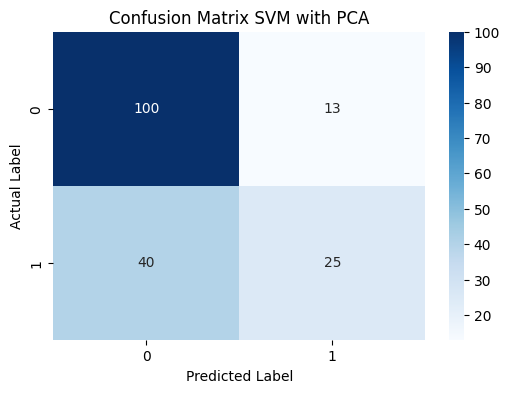

In [386]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix SVM with PCA')
plt.show()

In [387]:
TP = cm[1,1]  # True Positives
FP = cm[0,1]  # False Positives
FN = cm[1,0]  # False Negatives

# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(precision)
print(recall )
# Calculate F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score:{round(f1*100)}%")

0.6578947368421053
0.38461538461538464
F1 Score:49%
